<a href="https://colab.research.google.com/github/Keerthana22-elango/Machine_learning/blob/main/support_vector_machine_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Support Vector Regression Model
Mean Squared Error: 21685236.525478426
R^2 Score: 0.8521034006098306


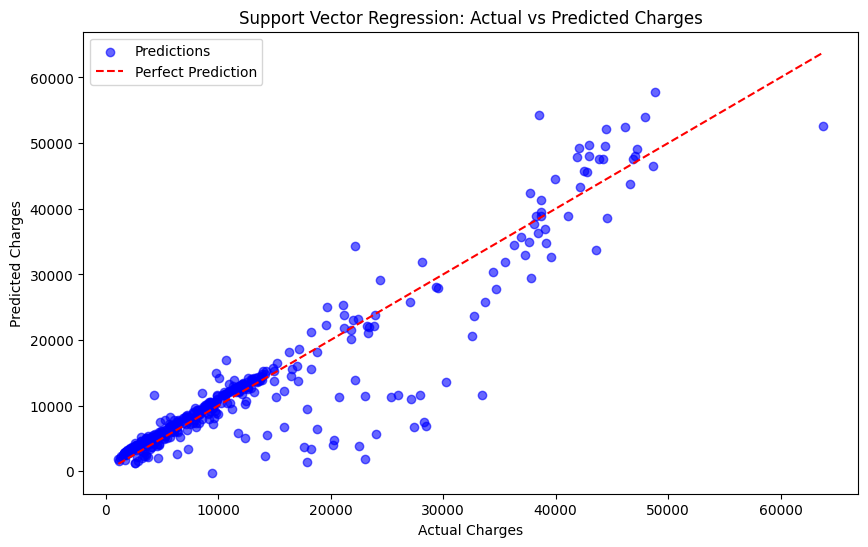

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/mnt/data/insurance.csv'  # Adjust this path if needed
insurance_data = pd.read_csv("insurance.csv")

# Encode categorical features
label_encoders = {}
for column in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    insurance_data[column] = le.fit_transform(insurance_data[column])
    label_encoders[column] = le

# Separate features and target variable
X = insurance_data.drop(columns=['charges'])
y = insurance_data['charges']

# Standardize features for SVR
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()  # Flatten y to make it 1D for SVR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# Train the Support Vector Regression model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)  # Adjust parameters as needed
svr_model.fit(X_train, y_train)

# Make predictions and transform back to original scale
y_pred_scaled = svr_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate performance metrics
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

# Display results summary
print("Support Vector Regression Model")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plot Predicted vs Actual Charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred, color='blue', alpha=0.6, label="Predictions")
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', label="Perfect Prediction")  # Line of perfect prediction
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Support Vector Regression: Actual vs Predicted Charges")
plt.legend()
plt.show()
